# Demonstração de Contraste Interativo


Utilizar os notebooks

- [Contraste Interativo via Window e Level](https://t-adessowiki.fee.unicamp.br/user/lotufo/notebooks/ia898_1s2017/ia898/master/tutorial_contraste_iterativo_2.ipynb)
- [Interactive jupyter widgets](https://t-adessowiki.fee.unicamp.br/user/lotufo/notebooks/ia898_1s2017/ia898/dev/widgets_Using%20Interact.ipynb)

para fazer uma demonstração interativa do Contraste via Window e Level. Na ferramenta interativa, deve ser possivel:

1. Selecionar algumas imagens
2. Variar dois ajustes: Window e Level
3. A imagem deve refletir a melhoria de contraste em função destes dois ajustes

In [1]:
mainDir = '/home/d191122'

In [2]:
# Necessário a execução dessa celula para a transformação WL de imagens coloridas

import io
from IPython.nbformat import current
import re

def find_word(text, search):
    ''' * Função find_word(text, search) busca uma palavra em uma texto
    Entradas:
        - text: String que contem o texto.
        - search: String que contem a palavra ou trecho de texto para a busca 
    Saídas:
        retorna True se a palavra for encontrada no texto e False, caso contrário.
    '''
    result = re.findall('\\b'+search+'\\b', text, flags=re.IGNORECASE)
    if len(result)>0:
        return True
    else:
        return False

def execute_notebook(path):
    ''' * Função execute_notebook(path) executa todas as celulas de um notebook, que contêm
        declarações de funções (def) em seu conteúdo
        Entradas:
            -path: String que contêm o diretório do arquivo .ipynb
        Saída:
            - Sem saídas.
    '''
    
    with io.open(path) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        if find_word(cell.input, 'def'):
            ip.run_cell(cell.input)    
        else:
            continue

/home/adessowiki/anaconda3/lib/python3.6/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/home/adessowiki/anaconda3/lib/python3.6/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def getImg(path):
    Img = mpimg.imread(mainDir+'/data/'+path)
    return Img

def TransformationWL(fileName,L,W):
    
    ''' Função TransformationWL(Img,L,W) realiza uma transformação linear nas intensidades
        de cor de uma imagem. A transformação reescalona as intensidades de cor para o 
        intervalo entre L-W/2 e L+W/2, o qual L representa a intensidade no centro da
        escala, L-W/2 é a intensidade mínimo escala (valor 0) e L-W/2 é a intensidade
        máximo escala (valor 255).
        Entradas:
            - Img: imagem colorida ou em escala de cinza.
            - L: centro da escala
            - W: largura da escala, ou seja, quantos diferentes valores de intensidade a
                 escala possui.
        Saída:
            - 
    '''
    Img = getImg(fileName)
    # Caculando os limites da escola 
    pMin = max(0, L-W//2) 
    pMax = min(255, L+W//2)
    
    # Criando a transformação linear
    tf = np.zeros(256, np.uint8)
    tf[pMin:pMax+1] = np.floor( np.linspace( 0, 255, pMax - pMin + 1) )
    tf[pMax:] = 255
    
    # Identificando tipo da imagem e aplicando a transformação
    if(len(Img.shape)>2):
        execute_notebook (mainDir+'/Aula_4/rgb_to_hsv.ipynb')
        execute_notebook (mainDir+'/Aula_4/hsv_to_rgb.ipynb')
        hsvImg = rgb_to_hsv(Img)
        S = hsvImg[:,:,2].astype(np.uint8)
        hsvImg[:,:,2] = tf[S]
        outputImg = hsv_to_rgb(hsvImg)
        
    else:
        outputImg = tf[Img]
    
    #plot settings
    fig = plt.figure(1)
    sp = fig.add_subplot(1,2,1)
    plt.imshow(Img, cmap="gray")
    sp.set_title('Imagem de entrada')
    sp=fig.add_subplot(1,2,2)
    plt.imshow(outputImg, cmap="gray")
    sp.set_title('Imagem de saída')
    
    plt.figure(2)
    plt.plot(tf)
    plt.title('Transformada de intensidade W=%d L=%d' % (W,L))
    
    return

In [4]:
#Widget configuration
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy as np

L_widget = widgets.IntSlider(min=0,max=255,step=1,value=127, continuous_update=False)
W_widget = widgets.IntSlider(min=0,max=256,step=1,value=256, continuous_update=False)

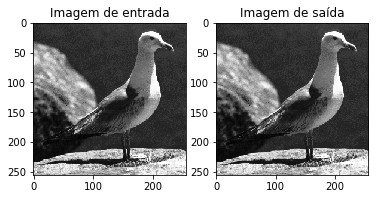

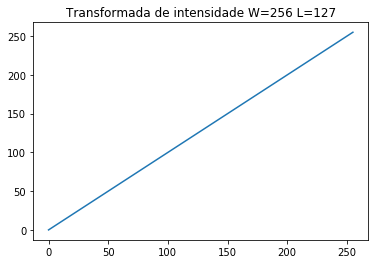

In [5]:
#teste 1 - imagem cinza com caixa de seleção
#Para Garantir que o teste funcione, execute a celula
import os
fileList = os.listdir(mainDir+"/data")
#print(fileList)

L_widget = widgets.IntSlider(min=0,max=255,step=1,value=127, continuous_update=False)
W_widget = widgets.IntSlider(min=0,max=256,step=1,value=256, continuous_update=False)
interact(TransformationWL,fileName=fileList,L=L_widget, W=W_widget);

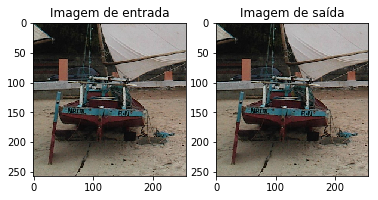

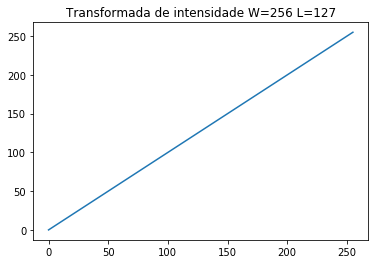

In [6]:
#teste 2 - imagem colorida
#Para Garantir que o teste funcione, execute a celula
L_widget = widgets.IntSlider(min=0,max=255,step=1,value=127, continuous_update=False)
W_widget = widgets.IntSlider(min=0,max=256,step=1,value=256, continuous_update=False)

interact(TransformationWL,fileName="boat.tif",L=L_widget, W=W_widget);

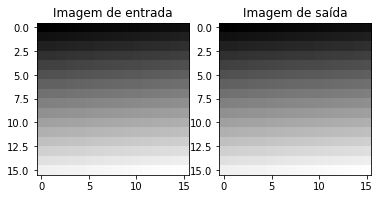

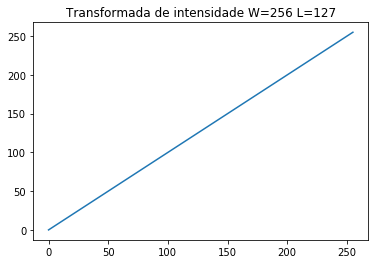

In [7]:
#teste 3 - teste numérico ou por imagem sintética
#Para arantir que o teste funcione, execute a celula

from PIL import Image
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

Img3 = np.arange(256).reshape(16,16)

if  not(os.path.exists(mainDir+'/data/imgSinte.tif')):
    im = Image.fromarray(Img3.astype(np.uint8))
    im.save(mainDir+'/data/imgSinte.tif')

L_widget = widgets.IntSlider(min=0,max=255,step=1,value=127, continuous_update=False)
W_widget = widgets.IntSlider(min=0,max=256,step=1,value=256, continuous_update=False)    
    
interact(TransformationWL,fileName="imgSinte.tif",L=L_widget, W=W_widget);